## **Technical Case Braskem **

## *Figuring Out Which Employee May Leave(Attrition)*

**Por:Rodrigo Souza** 

######Meu Linkedin: https://www.linkedin.com/in/ssrodrigo


In [1]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
# installing scikit-plot
!pip install -q scikit-plot

In [2]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# importing Machine Learning resources
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

** **Obtaining the data**


In [3]:
  df_Train = pd.read_csv('https://raw.githubusercontent.com/rodrigossgithub/BASE_TEMP/main/data_employees.csv')


In [4]:
# checking first entries
df_Train.head()

,Unnamed: 0,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,2,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,3,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,4,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,5,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [5]:
# checking info on the dataset
print("--- Inf. das variaveis ---")
print("variaveis:\t {}".format(df_Train.shape[1]))
print("entradas:\t {}\n".format(df_Train.shape[0]))
print("O Dataset não tem valores missing. \n")

# identificando os tipos das variáveis
display(df_Train.info())

--- Inf. das variaveis ---
variaveis:	 19
entradas:	 44692

O Dataset não tem valores missing. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44692 entries, 0 to 44691
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           44692 non-null  int64 
 1   EmployeeID           44692 non-null  int64 
 2   recorddate_key       44692 non-null  object
 3   birthdate_key        44692 non-null  object
 4   orighiredate_key     44692 non-null  object
 5   terminationdate_key  44692 non-null  object
 6   age                  44692 non-null  int64 
 7   length_of_service    44692 non-null  int64 
 8   city_name            44692 non-null  object
 9   department_name      44692 non-null  object
 10  job_title            44692 non-null  object
 11  store_name           44692 non-null  int64 
 12  gender_short         44692 non-null  object
 13  gender_full          44692 non-null  object
 14  termr

None

## **Exploratory Data Analysis**

In [6]:
# statistical distribution of the variables
df_Train.describe()

,Unnamed: 0,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,44692.000000,44692.00000,44692.000000,44692.000000,44692.000000,44692.000000
mean,24488.991430,4817.55435,41.982480,10.102882,27.257406,2010.125593
std,14248.109314,1810.41060,12.379483,6.182770,13.488000,2.573361
min,1.000000,1318.00000,19.000000,0.000000,1.000000,2006.000000
25%,12186.750000,3332.00000,31.000000,5.000000,16.000000,2008.000000
50%,24390.500000,4982.00000,42.000000,10.000000,28.000000,2010.000000
75%,36739.250000,6284.00000,52.000000,15.000000,42.000000,2012.000000
max,49653.000000,8336.00000,65.000000,25.000000,46.000000,2014.000000


In [7]:
# distribution of categorical features
df_Train.describe(include='O')

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,city_name,department_name,job_title,gender_short,gender_full,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT
count,44692,44692,44692,44692,44692,44692,44692,44692,44692,44692,44692,44692,44692
unique,117,5342,4415,1055,40,21,47,2,2,4,3,2,2
top,12/31/2013 0:00,4/27/1956,12/4/2004,1/1/1900,Vancouver,Meats,Meat Cutter,F,Female,Not Applicable,Not Applicable,ACTIVE,STORES
freq,5215,36,45,37651,10080,9358,9089,23407,23407,43369,43369,43369,44130


##Insight Values features
  * Média de idade 42 anos
  * Média de tempo na empresa 10 Anos

## Insights Categorical features
`Attrition` indicates whether an employee has presented attrition or not in the workplace. We'll use it as our target variable. In our dataset, this would be the most relevant feature for turnover, and that's why we'll focus on it.

Having access to more data, we could use and/or create new features that could better represent the chances of an employee leaving the company.

* Most employees haven't presented attrition.(Status=Termined)
* Meats is the department with the greater number of employees.
* Female are the majority in the company.
* The most common job in the company is Meat Cutter	.


##*Feature selection*

In [8]:
# removing unnecessary columns
df_Train.drop(['Unnamed: 0', 'STATUS_YEAR', 'birthdate_key', 'terminationdate_key', 'gender_full', 'orighiredate_key', 'recorddate_key'], axis=1, inplace=True)

df_Train.head()

,EmployeeID,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT
0,1318,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE
1,1318,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE
2,1318,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE
3,1318,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE
4,1318,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE


## **Target Variable**
####To make sure we can better understand and operate on our target variable, we have to transform it to numerics. We'll do that with the function below:



In [9]:
# encoding target variable
target_map = {'ACTIVE':0, 'TERMINATED':1}
# creating a column with the target variable converted to numerics
df_Train["Attrition_numerical"] = df_Train["STATUS"].apply(lambda x: target_map[x])

In [10]:
df_Train.head()

,EmployeeID,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT,Attrition_numerical
0,1318,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE,0
1,1318,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE,0
2,1318,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE,0
3,1318,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE,0
4,1318,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,ACTIVE,HEADOFFICE,0


In [11]:
df_Train.pivot_table(index='STATUS', columns='termreason_desc', values='length_of_service', aggfunc='count',margins=True)

termreason_desc,Layoff,Not Applicable,Resignaton,Retirement,All
STATUS,,,,,
ACTIVE,NaN,43369.0,NaN,NaN,43369
TERMINATED,142.0,NaN,359.0,822.0,1323
All,142.0,43369.0,359.0,822.0,44692


### Drop ***Layoff*** and  ***Retirement*** is not ***unwanted attrition*** 

In [12]:
df_Train1=df_Train.loc[df_Train['termreason_desc']!='Layoff']

df_Train1=df_Train1.loc[df_Train['termreason_desc']!='Retirement']

In [13]:
df_Train1.pivot_table(index='STATUS', columns='termreason_desc', values='length_of_service', aggfunc='count',margins=True)

termreason_desc,Not Applicable,Resignaton,All
STATUS,,,
ACTIVE,43369.0,NaN,43369
TERMINATED,NaN,359.0,359
All,43369.0,359.0,43728


## Density Graph

Density Graphs are powerful visual tools that can help us get valuable insights.

Our main goal here is to analyze distributions between the two classes of our classification problem (Attrition = 0 or 1).

Analyzing the differences in the distributions for each class, we can identify some of the variables that are more important to our problem.

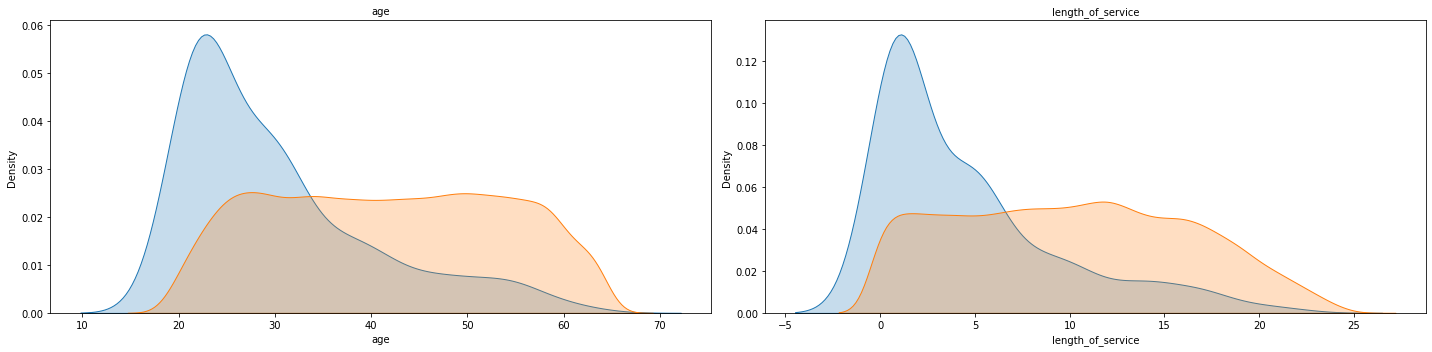

In [14]:
# plotando gráfico de densidade
colunas = df_Train1.drop(['city_name','EmployeeID', 'job_title','department_name',
                       'gender_short', 'termreason_desc', 'termtype_desc', 'STATUS',
                       'BUSINESS_UNIT','Attrition_numerical','store_name'], axis=1).columns
num_plots = len(colunas)
df_class_0 = df_Train1[df_Train.Attrition_numerical == 1]
df_class_1 = df_Train1[df_Train.Attrition_numerical == 0]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,5))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in colunas:
    idx += 1
    plt.subplot(1, 2, idx)
    sns.kdeplot(df_class_0[col], label="Attrition", shade=True)
    sns.kdeplot(df_class_1[col], label="No Attrition", shade=True)
    plt.title(col, fontsize=10)
plt.savefig('dist_en.png')
plt.tight_layout()

## Insights on Density Graphs

As stated before, Density Graphs are interesting tools for analyzing distribution between classes.

The distribution presented in *Blue* represents employees* with Attrition* and *orange*, for *employees that haven't experienced Attrition.*

What we're looking for here are differences between the distributions to find key points for predicting employee attrition.

* The distribution of **Age** leads to believe that younger employees have stronger tendencies for attrition.

* **length_of_service** show more attrition in the early years, and an evolution as time goes by. This can suggest adaptation problems, since the shorter the period, more likely the attrition.

In [15]:
df_class_0.groupby(['department_name']).department_name.value_counts(ascending=False)

department_name   department_name 
Bakery            Bakery               30
Customer Service  Customer Service    176
Dairy             Dairy                58
HR Technology     HR Technology         1
Meats             Meats                23
Processed Foods   Processed Foods      43
Produce           Produce              27
Store Management  Store Management      1
Name: department_name, dtype: int64

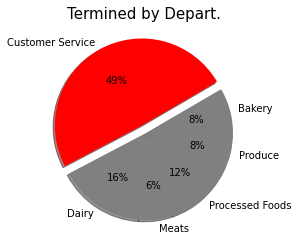

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fatias = [30, 176, 58,23,43,27]
labels = "Bakery", "Customer Service", "Dairy","Meats","Processed Foods","Produce"
colors = ['gray', 'Red', 'gray','gray','gray','gray']
explode = [0, 0.1, 0,0,0,0]
plt.pie(fatias, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.0f%%" )
plt.title('Termined by Depart. ', fontsize = 15)
plt.axis('off')
#plt.legend()
plt.show()

0    43369
1      359
Name: Attrition_numerical, dtype: int64

Attritions Represent 0.82% Do Dataset.



[]

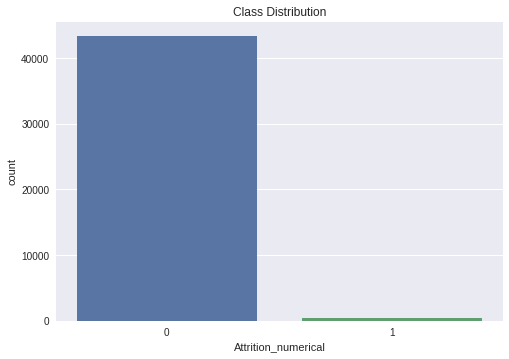

In [18]:
# checking distribution of target variable
print(df_Train1.Attrition_numerical.value_counts())
print("\nAttritions Represent {:.2f}% Do Dataset.\n".format((df_Train1[df_Train1.Attrition_numerical == 1].shape[0] / df_Train1.shape[0]) * 100))

# plotting bar graph
fig, ax = plt.subplots()

sns.countplot('Attrition_numerical', data=df_Train1, ax=ax)
ax.set_title('Class Distribution')
plt.savefig('imbalanced_dist.png')
plt.plot()

In [19]:
# Removing Features
main_df_final = df_Train1.drop(columns='EmployeeID')
main_df_final = main_df_final.drop(columns='STATUS')
main_df_final = main_df_final.drop(columns='termreason_desc')
main_df_final = main_df_final.drop(columns='termtype_desc')

main_df_final.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,BUSINESS_UNIT,Attrition_numerical
0,52,17,Vancouver,Executive,CEO,35,M,HEADOFFICE,0
1,53,18,Vancouver,Executive,CEO,35,M,HEADOFFICE,0
2,54,19,Vancouver,Executive,CEO,35,M,HEADOFFICE,0
3,55,20,Vancouver,Executive,CEO,35,M,HEADOFFICE,0
4,56,21,Vancouver,Executive,CEO,35,M,HEADOFFICE,0


No handles with labels found to put in legend.


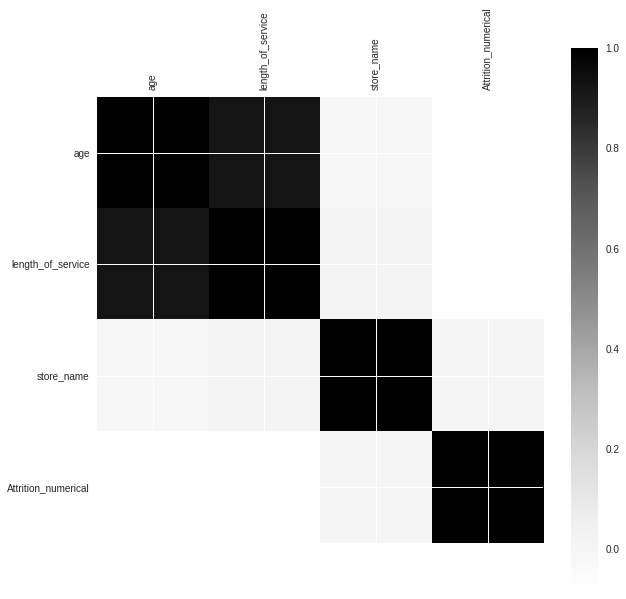

In [20]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(main_df_final)

# *Preparing our Dataset for Machine Learning*

Preparing The Data Machine Learning
To fit our data in a Machine Learning model we have to work on it. When preprocessing our data, we'll go through two different steps:

Transformation of categorical features: We'll use Label Encoder, which transforms Strings into numbers representing categories.

Transformation of numerical features: Using MinMaxScaler. To put it simply, MinMaxScaler orders the number on a scale from 0 to 1. This process also helps with outliers, hence why we didn't deal with them before.

In [21]:

# instantiating the encoder
le = LabelEncoder()

# encoding categorical features
main_df_final['gender_short'] = le.fit_transform(main_df_final['gender_short'])
main_df_final['city_name'] = le.fit_transform(main_df_final['city_name'])
main_df_final['department_name'] = le.fit_transform(main_df_final['department_name'])
main_df_final['job_title'] = le.fit_transform(main_df_final['job_title'])
main_df_final['BUSINESS_UNIT'] = le.fit_transform(main_df_final['BUSINESS_UNIT'])

main_df_final.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,BUSINESS_UNIT,Attrition_numerical
0,52,17,34,9,7,35,1,0,0
1,53,18,34,9,7,35,1,0,0
2,54,19,34,9,7,35,1,0,0
3,55,20,34,9,7,35,1,0,0
4,56,21,34,9,7,35,1,0,0


In [22]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43728 entries, 0 to 44690
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  43728 non-null  int64
 1   length_of_service    43728 non-null  int64
 2   city_name            43728 non-null  int64
 3   department_name      43728 non-null  int64
 4   job_title            43728 non-null  int64
 5   store_name           43728 non-null  int64
 6   gender_short         43728 non-null  int64
 7   BUSINESS_UNIT        43728 non-null  int64
 8   Attrition_numerical  43728 non-null  int64
dtypes: int64(9)
memory usage: 4.6 MB


In [23]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = main_df_final.drop(['Attrition_numerical'],axis=1).values

# We assigned those label values to our Y dataset
y = main_df_final['Attrition_numerical'].values

In [24]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
df_train_final = pd.DataFrame(X_train)
df_train_final.head()

,0,1,2,3,4,5,6,7
0,0.610443,0.799097,0.915817,1.157041,0.987976,1.087043,-0.960497,0.109552
1,-0.874737,-0.817252,0.368150,-0.733640,-0.637506,0.126423,1.041127,0.109552
2,-0.214657,-0.170712,0.915817,-0.922709,-0.990872,1.087043,1.041127,0.109552
3,0.857973,0.637462,-0.909739,0.778905,0.775957,-0.908092,-0.960497,0.109552
4,-0.544697,-0.332347,1.372206,-0.733640,-0.637506,0.939256,1.041127,0.109552


In [27]:
df_train_final.describe()

,0,1,2,3,4,5,6,7
count,3.060900e+04,3.060900e+04,3.060900e+04,3.060900e+04,3.060900e+04,3.060900e+04,3.060900e+04,3.060900e+04
mean,8.875908e-17,-8.524169e-17,6.309798e-16,3.494107e-16,-5.460619e-17,1.552404e-17,4.120981e-16,-2.122514e-16
std,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,-1.864856e+00,-1.625427e+00,-2.187629e+00,-2.057117e+00,-1.626930e+00,-1.942606e+00,-9.604973e-01,-9.128106e+00
25%,-8.747366e-01,-8.172520e-01,-8.184616e-01,-9.227086e-01,-9.908717e-01,-8.341977e-01,-9.604973e-01,1.095518e-01
50%,3.287298e-02,-9.077409e-03,2.768721e-01,7.789046e-01,7.759569e-01,5.252890e-02,-9.604973e-01,1.095518e-01
75%,8.579726e-01,7.990972e-01,9.158168e-01,9.679728e-01,9.879763e-01,1.087043e+00,1.041127e+00,1.095518e-01
max,1.930602e+00,2.415446e+00,1.372206e+00,1.724245e+00,1.624035e+00,1.382619e+00,1.041127e+00,1.095518e-01


# Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 99.12%
[[13004     0]
 [  115     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13004
           1       0.00      0.00      0.00       115

    accuracy                           0.99     13119
   macro avg       0.50      0.50      0.50     13119
weighted avg       0.98      0.99      0.99     13119



##Test your model on a new row of data

In [32]:
df_Test= pd.read_csv('https://raw.githubusercontent.com/rodrigossgithub/BASE_TEMP/main/eval_set.csv')

In [34]:
  #factors that will predict the price
  desired_factors = ['age','length_of_service','city_name','department_name','job_title','store_name','gender_short','BUSINESS_UNIT']

# Convert to pandas dataframe
input_data = df_Test[desired_factors]

In [49]:
input_data.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,BUSINESS_UNIT
0,61,26,26,8,6,35,1,0
1,58,26,26,8,28,35,0,0
2,60,26,26,8,18,35,0,0
3,56,26,26,8,27,35,1,0
4,57,26,26,8,26,35,1,0


In [45]:

# instantiating the encoder
le = LabelEncoder()

# encoding categorical features
input_data['gender_short'] = le.fit_transform(input_data['gender_short'])
input_data['city_name'] = le.fit_transform(input_data['city_name'])
input_data['department_name'] = le.fit_transform(input_data['department_name'])
input_data['job_title'] = le.fit_transform(input_data['job_title'])
input_data['BUSINESS_UNIT'] = le.fit_transform(input_data['BUSINESS_UNIT'])


# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(input_data)
X_test = sc.transform(input_data)

In [50]:
# Run prediction for our test sameple, 0 means employee will not leave, 1 means they are likely to leave/resign
model.predict(input_data)
# print probabilities of belonging to either class
model.predict_proba(input_data)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01]])

#Random Forest Classifer

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 99.05%
[[12992    12]
 [  113     2]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13004
           1       0.14      0.02      0.03       115

    accuracy                           0.99     13119
   macro avg       0.57      0.51      0.51     13119
weighted avg       0.98      0.99      0.99     13119



In [41]:
main_df_final.drop(['Attrition_numerical'],axis=1).columns

Index(['age', 'length_of_service', 'city_name', 'department_name', 'job_title',
       'store_name', 'gender_short', 'BUSINESS_UNIT'],
      dtype='object')

**More Important Variables**
Another important verification we can make is Feature Importance, checking what features were more important for the decisions of our model.

In [42]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
0,0.328411
1,0.226289
5,0.162474
2,0.156821
6,0.070071
4,0.030185
3,0.025615
7,0.000133


`*Conclusions - Random Forest*`

The Random Forest model did slightly better than Logistic Regression.

Even though it's not a big improvement, with proper tuning, both models can be improved.

However, the most important variables are extremely valuable, since they can give us insights on the most critical points of attrition, and, with that information, the company can act before the attrition even happens.

Among the most important variables, I'd like to highlight:

OverTime is definitely the most important variable.
MonthlyIncome
StockOptionLevel
Age
JobLevel
TotalWorkingYears
We can identify many variables related to career, benefits, and workload. High levels of stress? Feeling of underappreciation? These are only hypotheses. Only a deeper analysis with more context of the company and the employees can tell us for sure.

In [ ]:
##{column:len(X[column].unique())for column in X.columns}